In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
df=pd.read_csv('D:/shree/bigdatamart_Train.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical Features:
- Item_Identifier
- Item_Fat_Content 
- Item_Type 
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type 
- Outlet_Type

In [8]:
#checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handling missing values

Mean--->avarage value

Mode--->most repeated value

In [9]:
df['Item_Weight'].mean()

12.857645184136183

Filling the missing value in Item weight with mean value

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filling the missing value by mode in outlet size

In [12]:
mode_Outlet_Size=df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [13]:
print(mode_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
missing_values=df['Outlet_Size'].isnull()

In [15]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
df.loc[missing_values, 'Outlet_Size']=df.loc[missing_values, 'Outlet_Size'].apply(lambda x: mode_Outlet_Size)

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features

In [19]:
sns.set()

<Figure size 432x432 with 0 Axes>

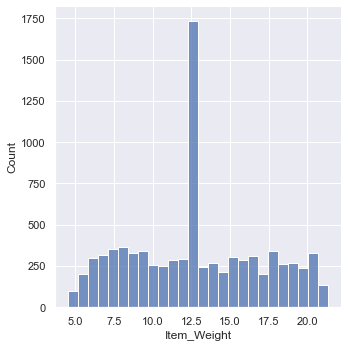

In [20]:
#Item weight distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'])
plt.show()

The average weight in data is around 12.5

<Figure size 432x432 with 0 Axes>

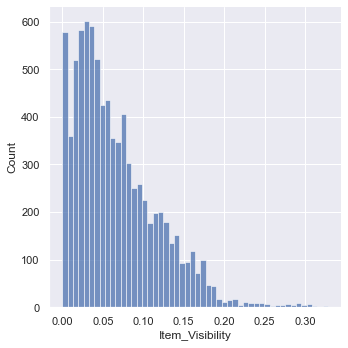

In [21]:
#Item Item_Visibilitydistribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

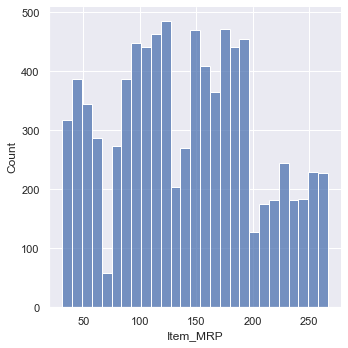

In [22]:
#Item Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

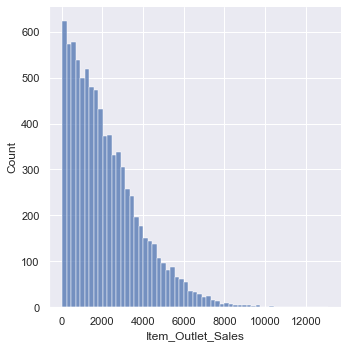

In [23]:
#Item Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(df['Item_Outlet_Sales'])
plt.show()

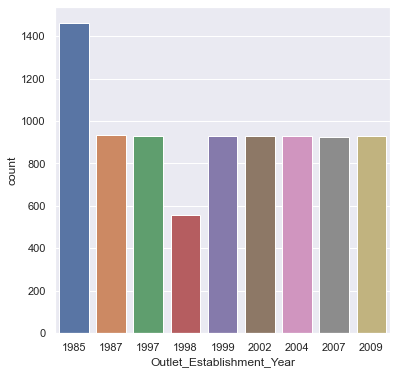

In [24]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data =df)
plt.show()

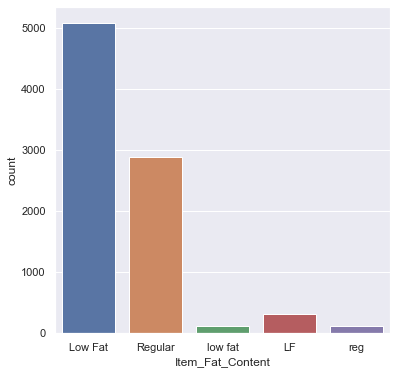

In [25]:
# Item_Fat_Content  column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data =df)
plt.show()

We can see here that there is need to be  clean the data, as low fat data has been seen in 3 different bars and Regular data is splited in 2 different bar.

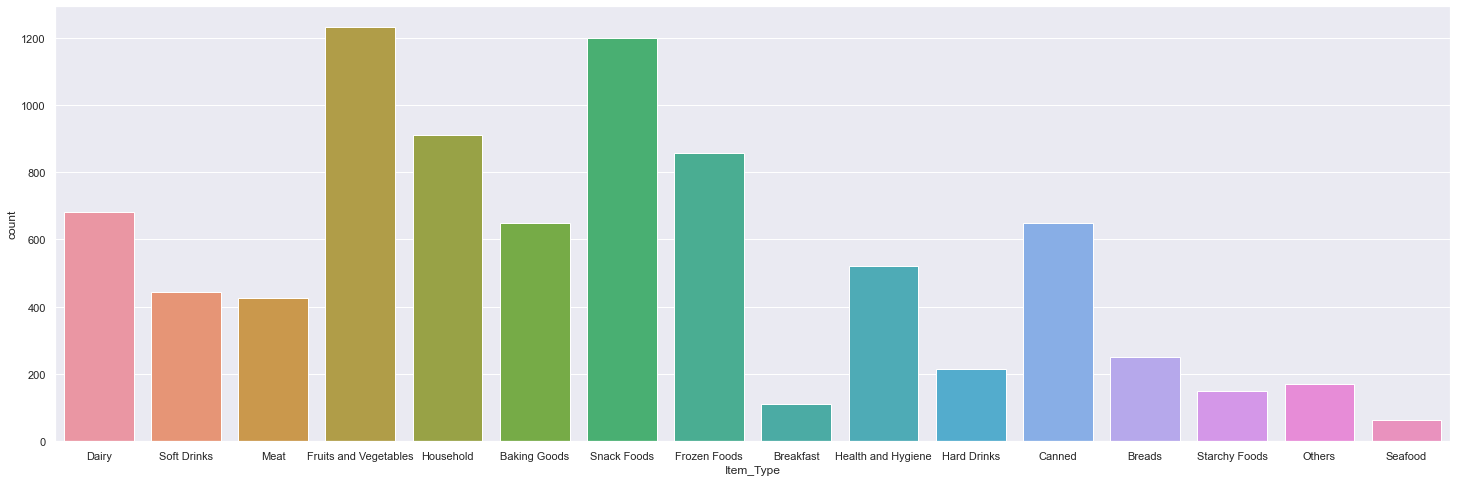

In [26]:
# Item_Type  column
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type',data =df)
plt.show()

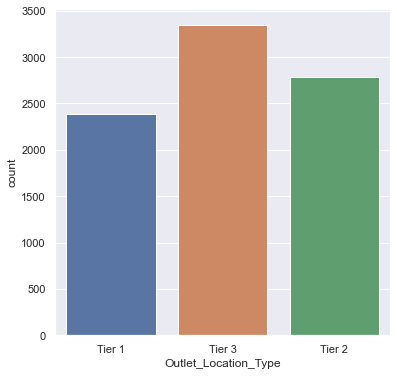

In [27]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data =df)
plt.show()

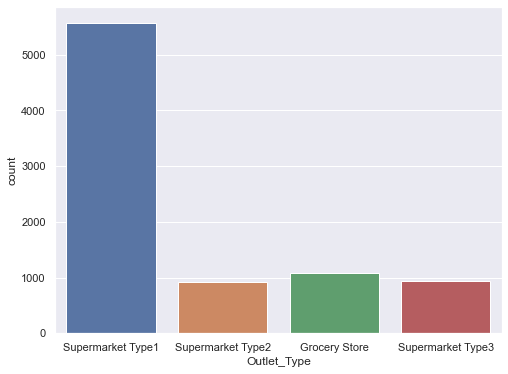

In [28]:
# Outlet_Type column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Type',data =df)
plt.show()

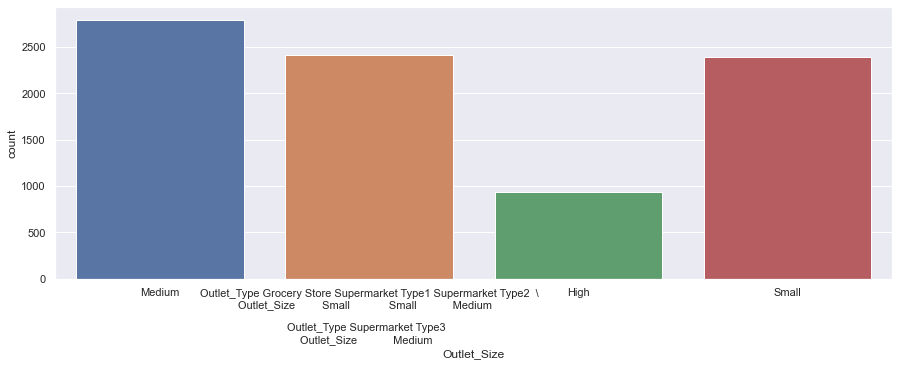

In [29]:
# Outlet_Size column
plt.figure(figsize=(15,5))
sns.countplot(data =df.astype({'Outlet_Size':'str'}),x='Outlet_Size')
plt.show()

# Data Pre Processing

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df.replace({'Item_Fat_Content':{'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'}},inplace=True)

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Lable Encoding

In [34]:
encoder=LabelEncoder()

In [35]:
df['Item_Identifier']=encoder.fit_transform(df['Item_Identifier'])


In [36]:
df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])


In [37]:
df['Item_Type']=encoder.fit_transform(df['Item_Type'])


In [38]:
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])


In [39]:

df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])

In [40]:
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [41]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,Medium,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,High,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,Medium,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,Outlet_Type Grocery Store Supermarket Type1 Su...,1,1,4710.5350


# Splitting Features and Target

In [42]:
df=df.astype({'Outlet_Size':'str'})

In [43]:
column_values = df[['Outlet_Size']]. values. ravel()
unique_values = pd. unique(column_values)
unique_values

array(['Medium',
       'Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \\\nOutlet_Size         Small             Small            Medium   \n\nOutlet_Type Supermarket Type3  \nOutlet_Size            Medium  ',
       'High', 'Small'], dtype=object)

In [44]:
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
x=df.drop(columns='Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [47]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [48]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting data into training and testing data 

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
print(x.shape,x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(8523, 11) (6818, 11) (1705, 11)
(6818,) (1705,)


# Machine Learning Model Training

XgBoost Regressor

In [53]:
regressor=XGBRegressor()

In [54]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Evaluation

In [55]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [56]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [59]:
print('R squared value =' ,r2_train)

R squared value = 0.8537744099584121


In [66]:
#prediction on testing data
testing_data_prediction=regressor.predict(x_test)

In [67]:
# R squared value
r2_test=metrics.r2_score(y_test,testing_data_prediction)

In [68]:
print('R squared value =' ,r2_test)

R squared value = 0.5163513742508767


In [69]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,3,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [77]:
datatoexcel = pd.ExcelWriter('df.xlsx')
df.to_excel(datatoexcel)
datatoexcel.save()